In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set(style="darkgrid")

tf_color = {True: "green", False: "red"}
type_color = {"I": "red", "S": "blue", "F": "yellow", "C": "green"}

# Task Data #

The task data is parsed first.

In [2]:
task_df = pd.read_csv('../data/processed/task_data.csv')
task_df

,p_number,major,screen_size,t1_type,t1_isSuccess,t1_numWords,t2_type,t2_isSuccess,t2_numWords,t3_type,t3_isSuccess,t3_numWords,t4_type,t4_isSuccess,t4_numWords,t5_type,t5_isSuccess,t5_numWords,t6_type,t6_isSuccess,t6_numWords,t7_type,t7_isSuccess,t7_numWords,t8_type,t8_isSuccess,t8_numWords,t9_type,t9_isSuccess,t9_numWords,t10_type,t10_isSuccess,t10_numWords
0,1,Education,Small,C,True,6,F,True,4,F,True,4,C,True,5,C,True,3,C,True,6,C,True,4,C,True,2,C,True,11,F,True,2
1,2,Computer Science,Medium,C,True,7,C,True,7,C,True,5,C,True,6,C,True,9,C,True,6,C,True,5,C,True,3,C,False,2,C,True,7
2,3,Education,Large,F,True,3,F,True,4,F,True,4,C,True,7,F,True,2,F,True,4,C,True,3,C,True,2,F,True,8,C,True,3
3,4,Education,Small,C,True,3,C,True,6,C,True,5,C,True,6,C,True,3,S,False,1,S,True,1,F,True,2,I,False,0,C,True,3
4,5,Education,Medium,C,True,4,F,True,4,F,True,5,C,True,6,C,True,6,C,True,6,S,True,1,C,True,4,C,False,5,F,True,3
5,6,Computer Science,Large,F,True,6,C,True,5,F,True,4,F,True,5,F,True,6,F,True,6,F,True,6,C,True,2,C,True,2,F,True,8
6,7,Education,Small,F,True,3,F,True,4,C,True,5,C,True,6,C,True,7,C,True,6,C,True,6,C,True,2,C,True,13,F,True,5
7,8,Computer Science,Medium,F,True,4,F,True,3,F,True,2,F,True,8,C,True,7,F,True,5,F,True,5,C,True,2,F,True,11,F,True,6
8,9,Computer Science,Large,C,True,6,C,True,6,C,True,4,F,True,5,C,True,4,C,True,7,C,True,4,C,True,5,C,True,11,C,True,6
9,10,Education,Small,F,True,4,F,True,3,F,True,4,F,True,5,F,True,4,C,True,7,F,True,4,C,True,2,F,True,7,C,True,6


## All Data Descriptive Stats ##

First, descriptive stats about all the data are calculated. For the length of response, numerical stats are calculated (i.e., mean, SD, etc.). For type and success, counts of each value are calculated, as these variables are categorical.

In [3]:
num_words = task_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
types     = task_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
success   = task_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]

In [4]:
num_words.describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,4.500000,4.555556,4.444444,6.222222,5.833333,5.555556,4.333333,2.888889,7.111111,5.055556
std,1.294786,1.503808,1.464169,1.555089,2.036433,1.542428,1.533930,1.131833,4.213269,1.862074
min,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000
25%,3.250000,4.000000,4.000000,5.000000,4.250000,5.000000,4.000000,2.000000,3.500000,3.000000
50%,4.000000,4.500000,4.000000,6.000000,6.000000,6.000000,4.500000,2.000000,7.500000,5.500000
75%,5.750000,6.000000,5.000000,7.000000,7.000000,6.000000,5.000000,4.000000,11.000000,6.750000
max,7.000000,7.000000,9.000000,10.000000,9.000000,8.000000,7.000000,5.000000,13.000000,8.000000


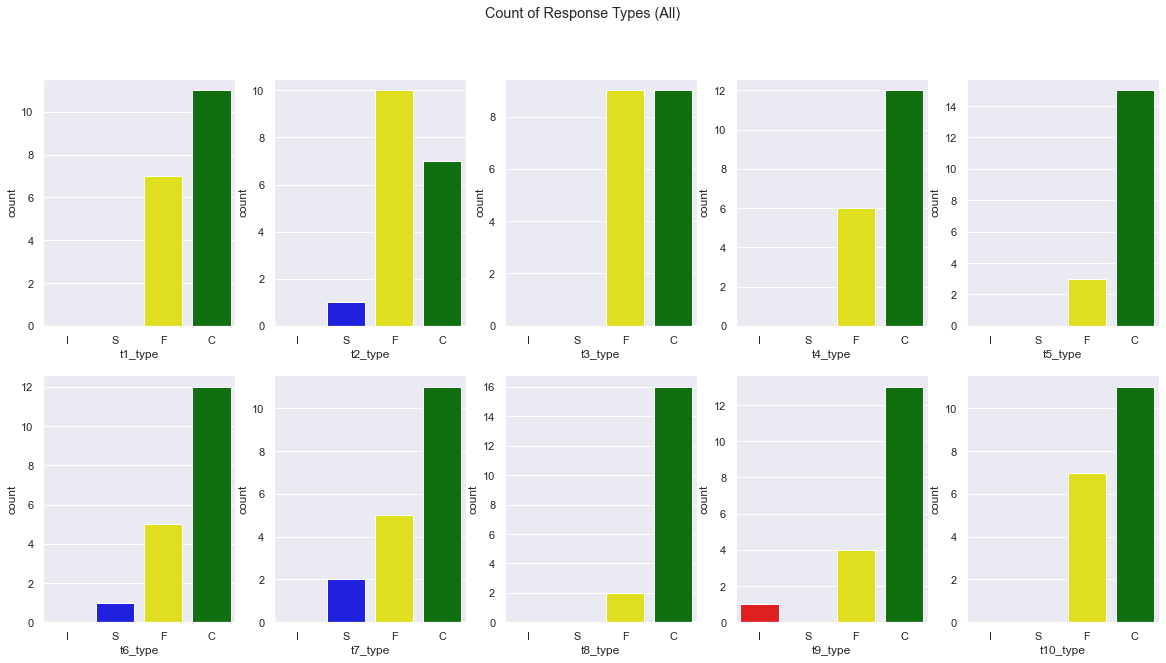

In [5]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (All)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=types)
    
    index = index + 1
    
plt.savefig("../figures/type_all.png", bbox_inches="tight")

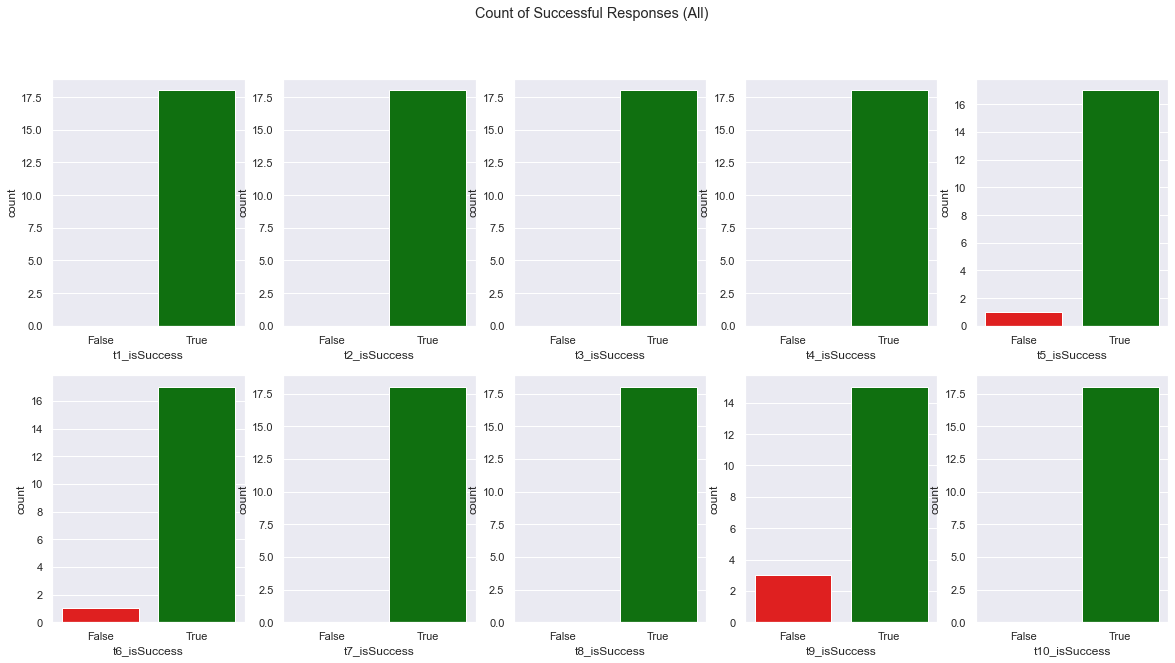

In [6]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (All)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=success)
    
    index = index + 1

plt.savefig("../figures/success_all.png", bbox_inches="tight")

## Descriptive Stats by Screen Size ##

The data is now broken up by screen size. This is done to answer the research question about screen size having an impact on the data.

### Screen Size Breakdown ###

In [7]:
small_df = task_df[task_df["screen_size"] == "Small"]
med_df   = task_df[task_df["screen_size"] == "Medium"]
large_df = task_df[task_df["screen_size"] == "Large"]

In [8]:
sizes = task_df["screen_size"].value_counts()
sizes

Large     6
Medium    6
Small     6
Name: screen_size, dtype: int64

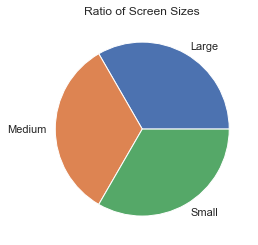

In [9]:
fig = plt.figure(facecolor="white", figsize=(4,4))
ax = sizes.plot.pie(title="Ratio of Screen Sizes")
ax.set_ylabel("")

plt.savefig("../figures/size_ratio.png", bbox_inches="tight")

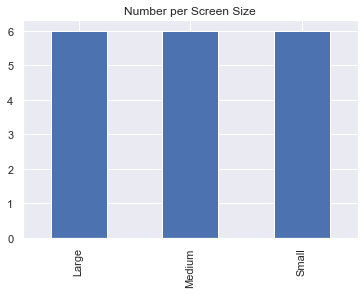

In [10]:
sizes.plot(kind="bar", title="Number per Screen Size")

plt.savefig("../figures/size_count.png", bbox_inches="tight")

In [11]:
small_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000
mean,4.000000,4.333333,4.333333,6.333333,4.833333,5.000000,4.00000,2.833333,8.333333,4.333333
std,1.095445,1.032796,0.516398,1.861899,1.834848,2.097618,1.67332,1.329160,4.546061,1.966384
min,3.000000,3.000000,4.000000,5.000000,3.000000,1.000000,1.00000,2.000000,0.000000,2.000000
25%,3.250000,4.000000,4.000000,5.250000,3.250000,5.000000,4.00000,2.000000,7.500000,3.000000
50%,4.000000,4.000000,4.000000,6.000000,4.500000,5.500000,4.00000,2.000000,9.500000,4.000000
75%,4.000000,4.750000,4.750000,6.000000,6.500000,6.000000,4.75000,3.500000,10.750000,5.750000
max,6.000000,6.000000,5.000000,10.000000,7.000000,7.000000,6.00000,5.000000,13.000000,7.000000


In [12]:
med_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.833333,4.500000,4.666667,6.166667,6.833333,5.833333,4.500000,2.833333,6.500000,4.833333
std,1.471960,2.258318,2.422120,1.722401,1.471960,1.329160,1.974842,0.983192,3.674235,1.722401
min,3.000000,1.000000,2.000000,3.000000,5.000000,4.000000,1.000000,2.000000,2.000000,3.000000
25%,4.000000,3.250000,3.250000,6.000000,6.000000,5.250000,4.250000,2.000000,5.000000,3.250000
50%,4.500000,5.000000,4.500000,6.500000,6.500000,6.000000,5.000000,2.500000,5.000000,5.000000
75%,5.750000,6.000000,5.000000,7.000000,7.750000,6.000000,5.000000,3.750000,9.500000,6.000000
max,7.000000,7.000000,9.000000,8.000000,9.000000,8.000000,7.000000,4.000000,11.000000,7.000000


In [13]:
large_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,4.666667,4.833333,4.333333,6.166667,5.833333,5.833333,4.500000,3.000000,6.50000,6.000000
std,1.366260,1.169045,1.032796,1.329160,2.483277,1.169045,1.048809,1.264911,4.84768,1.788854
min,3.000000,3.000000,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,2.00000,3.000000
25%,3.500000,4.250000,4.000000,5.000000,4.500000,5.250000,4.000000,2.000000,2.25000,5.250000
50%,5.000000,5.000000,4.000000,6.000000,6.500000,6.000000,4.500000,2.500000,5.50000,6.500000
75%,5.750000,5.750000,4.750000,7.000000,7.000000,6.750000,5.000000,3.750000,10.25000,7.000000
max,6.000000,6.000000,6.000000,8.000000,9.000000,7.000000,6.000000,5.000000,13.00000,8.000000


### Categories ###

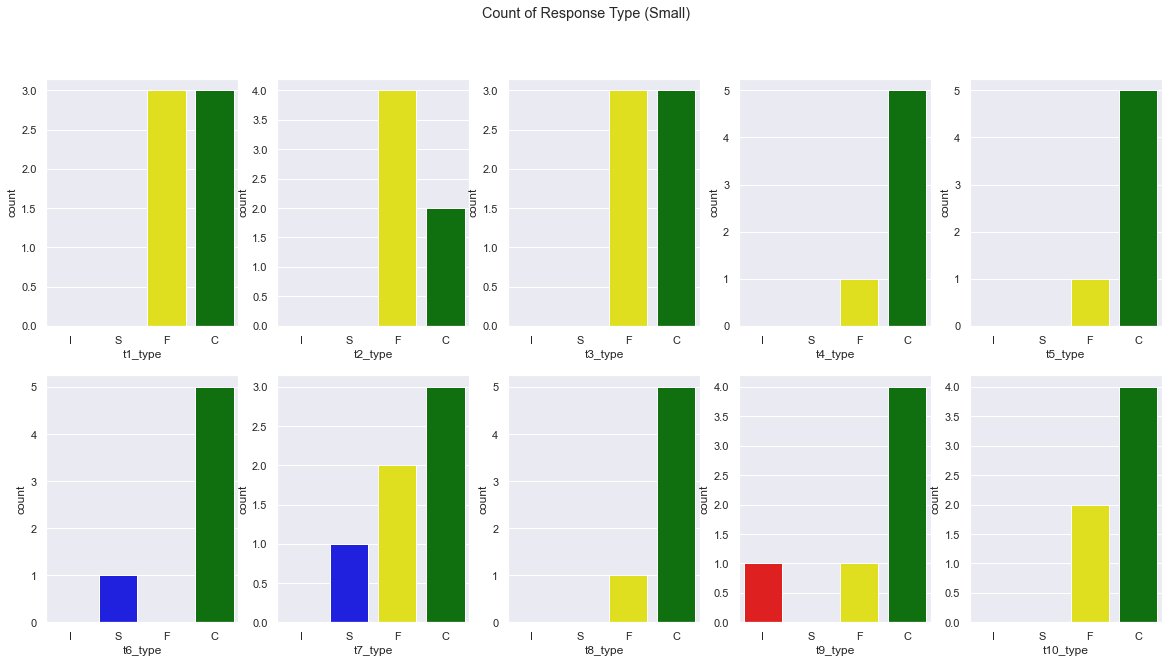

In [14]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Type (Small)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=small_df)
    
    index = index + 1
    
plt.savefig("../figures/type_small.png", bbox_inches="tight")

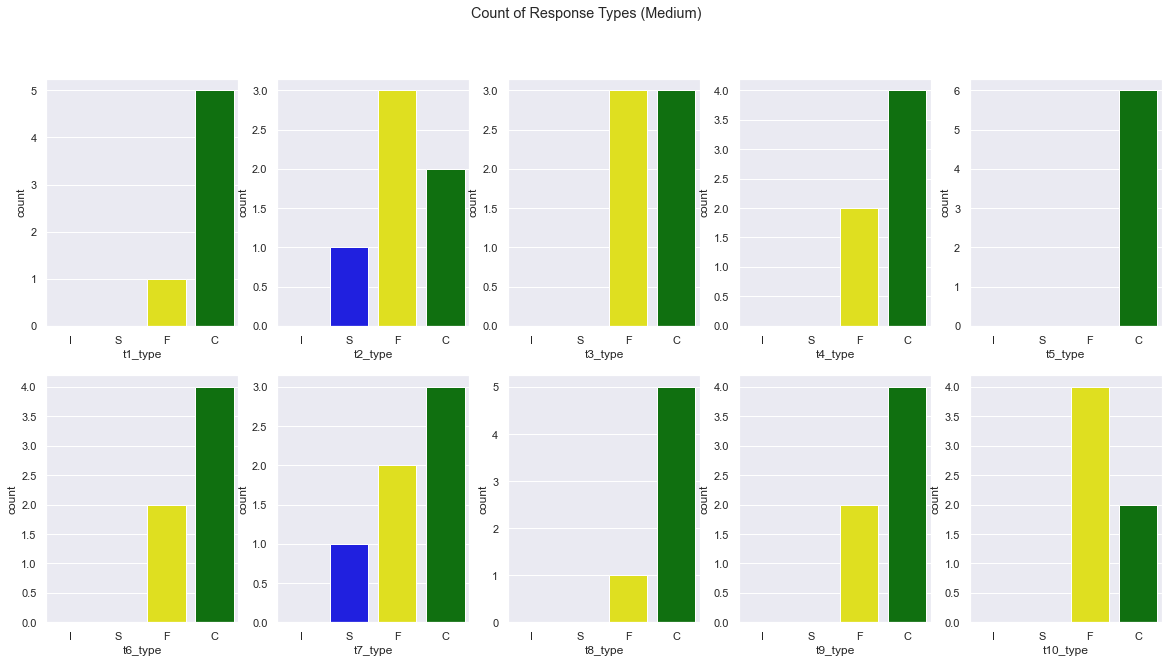

In [15]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Medium)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=med_df)
    
    index = index + 1
    
plt.savefig("../figures/type_med.png", bbox_inches="tight")

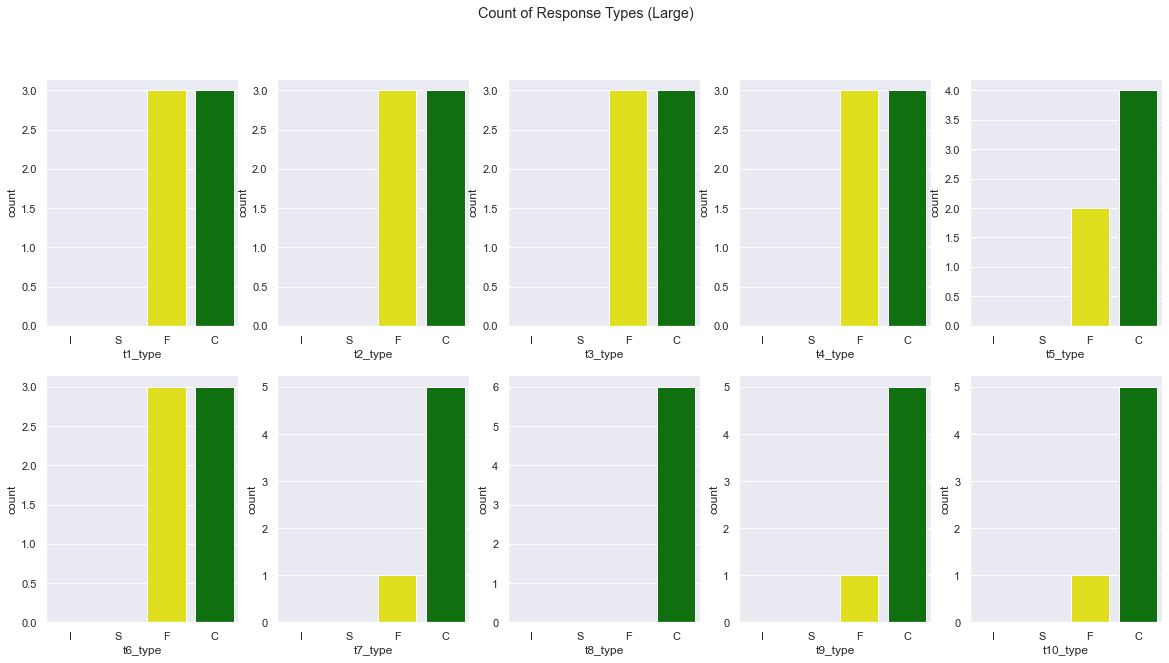

In [16]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Large)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=large_df)
    
    index = index + 1
    
plt.savefig("../figures/type_large.png", bbox_inches="tight")

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task and each screen size is calculated.

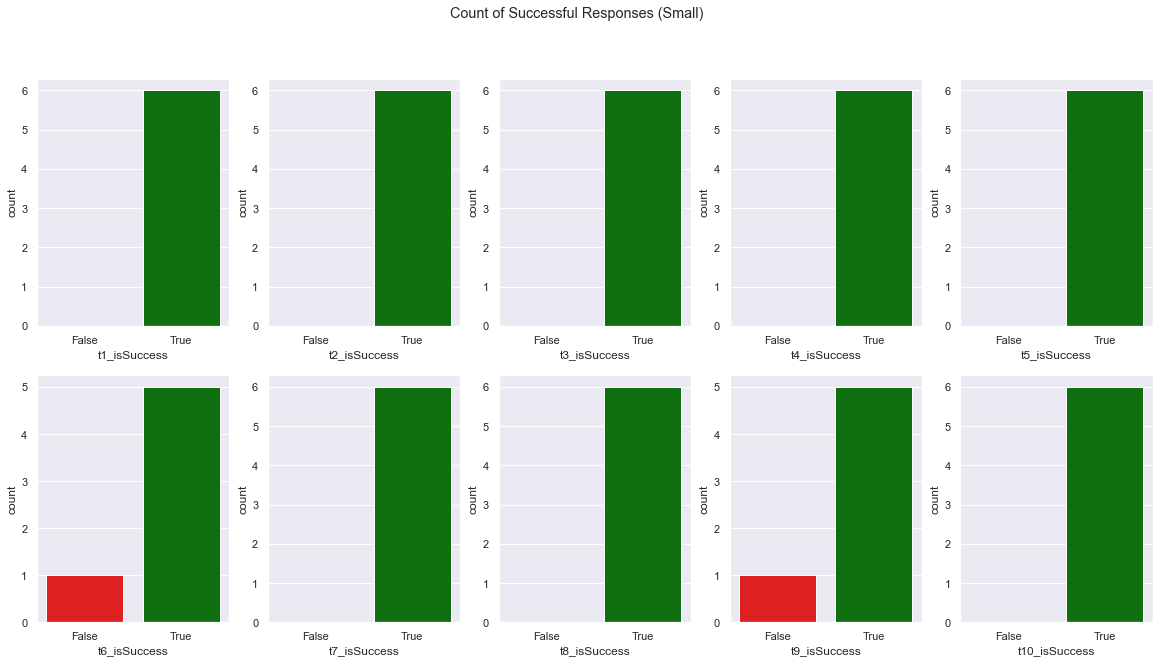

In [17]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Small)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=small_df)
    
    index = index + 1
    
plt.savefig("../figures/success_small.png", bbox_inches="tight")

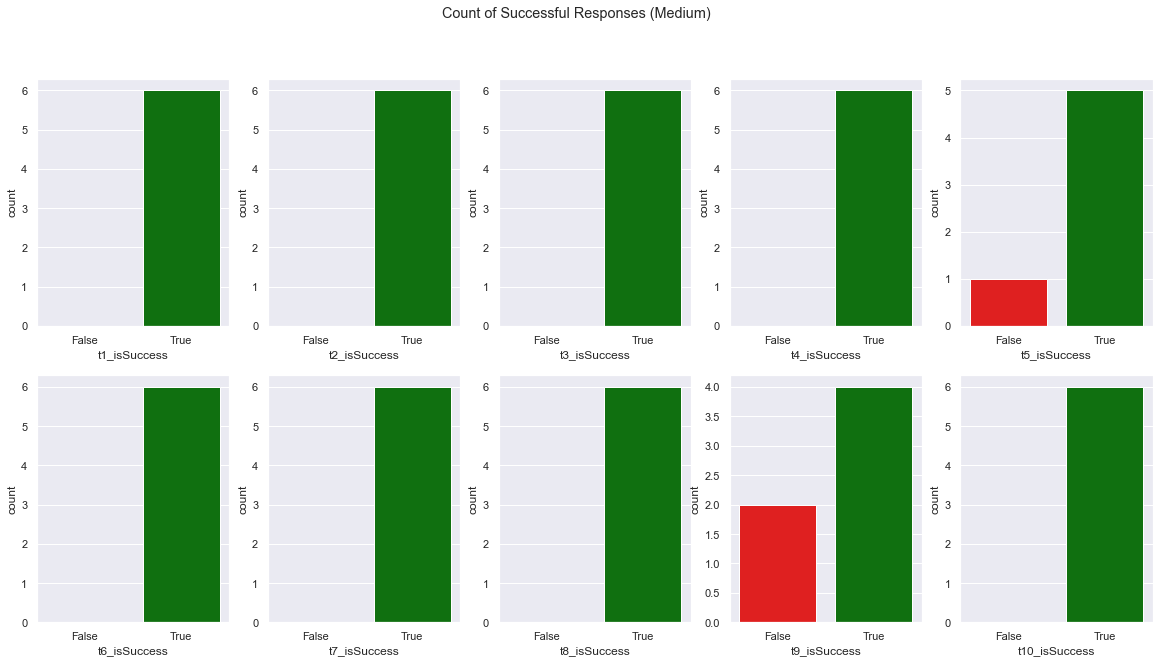

In [18]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Medium)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=med_df)
    
    index = index + 1
    
plt.savefig("../figures/success_med.png", bbox_inches="tight")

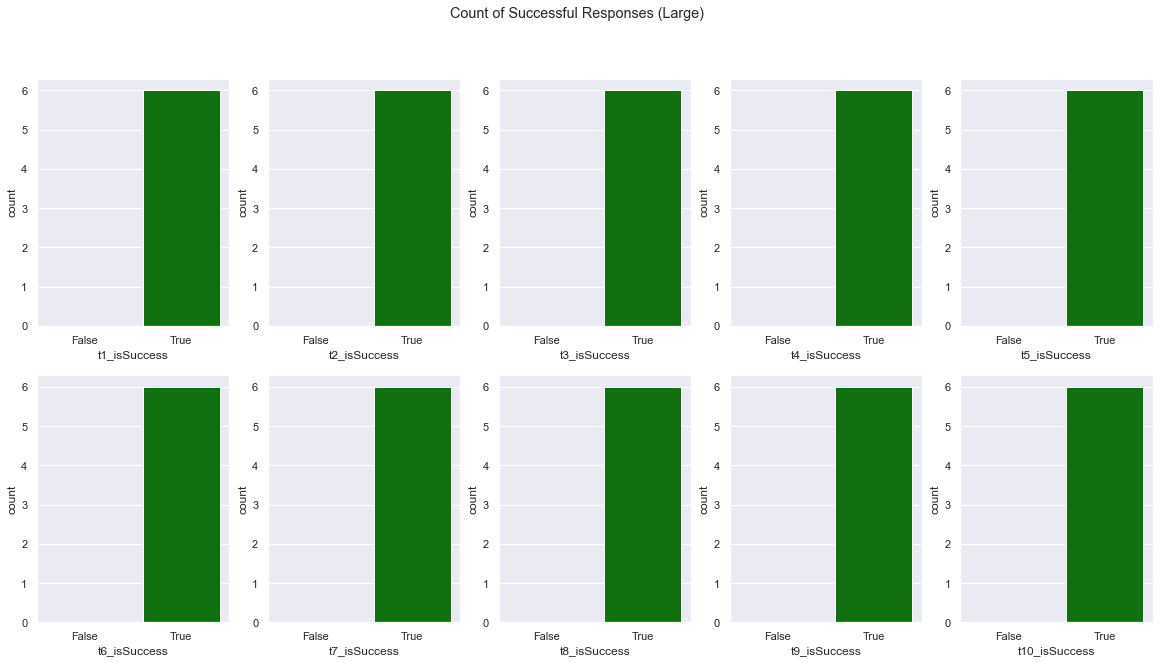

In [19]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Large)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=large_df)
    
    index = index + 1
    
plt.savefig("../figures/success_large.png", bbox_inches="tight")

## Descriptive Stats by Major ##

The data is now broken up by major. This is done to answer the research question about major having an impact on the data.

### Major Breakdown ###

In [20]:
cs_df = task_df[task_df["major"] == "Computer Science"]
ed_df = task_df[task_df["major"] == "Education"]

In [21]:
majors = task_df["major"].value_counts()
majors

Education           12
Computer Science     6
Name: major, dtype: int64

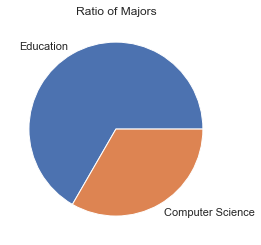

In [22]:
fig = plt.figure(facecolor="white")
ax = majors.plot.pie(title="Ratio of Majors")
ax.set_ylabel("")

plt.savefig("../figures/major_ratio.png", bbox_inches="tight")

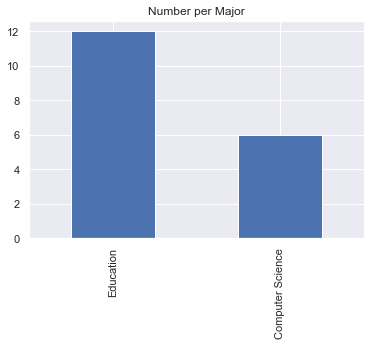

In [23]:
majors.plot(kind="bar", title="Number per Major")

plt.savefig("../figures/major_count.png", bbox_inches="tight")

### Categories ###

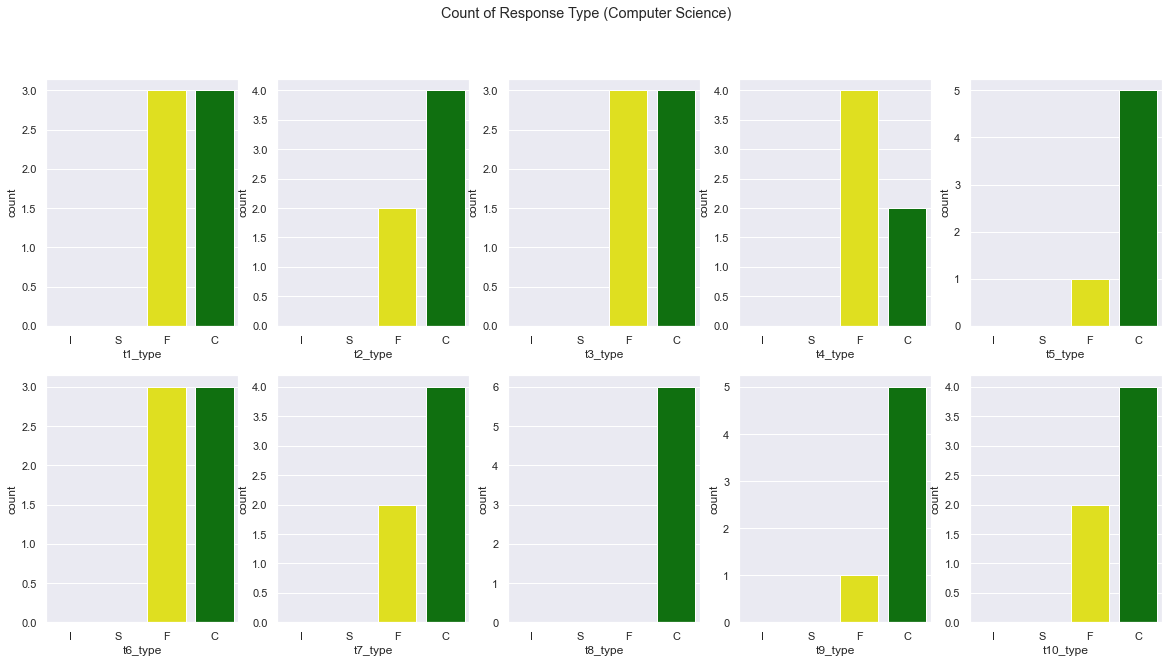

In [24]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Type (Computer Science)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=cs_df)
    
    index = index + 1
    
plt.savefig("../figures/type_cs.png", bbox_inches="tight")

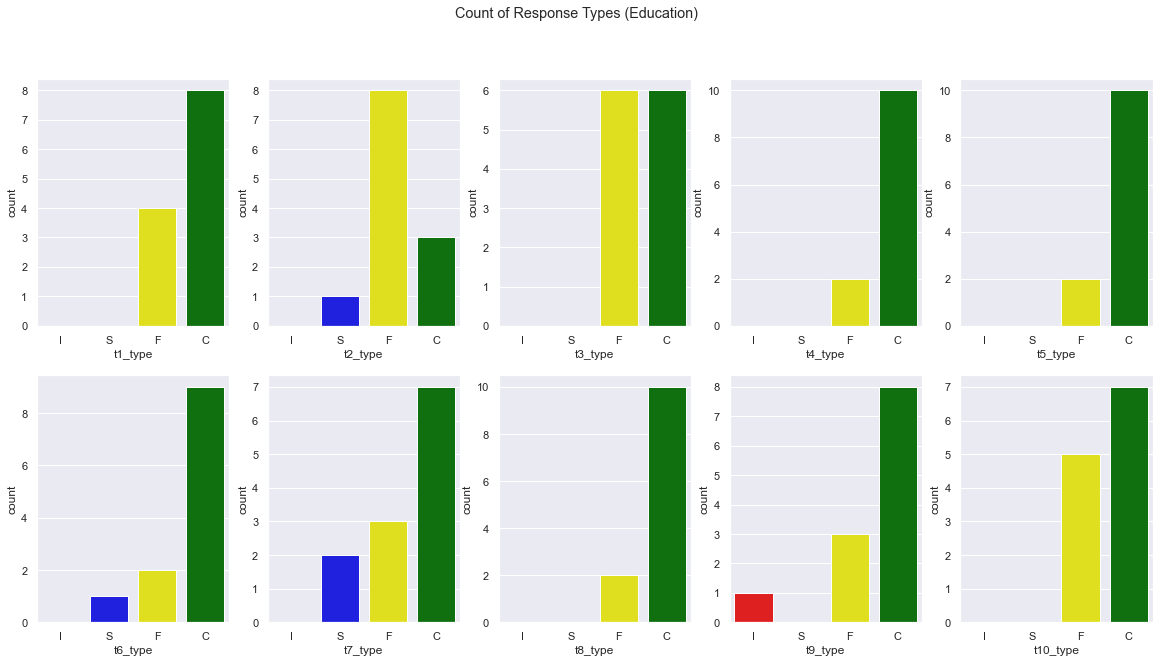

In [25]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Education)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=ed_df)
    
    index = index + 1
    
plt.savefig("../figures/type_ed.png", bbox_inches="tight")

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task and each screen size is calculated.

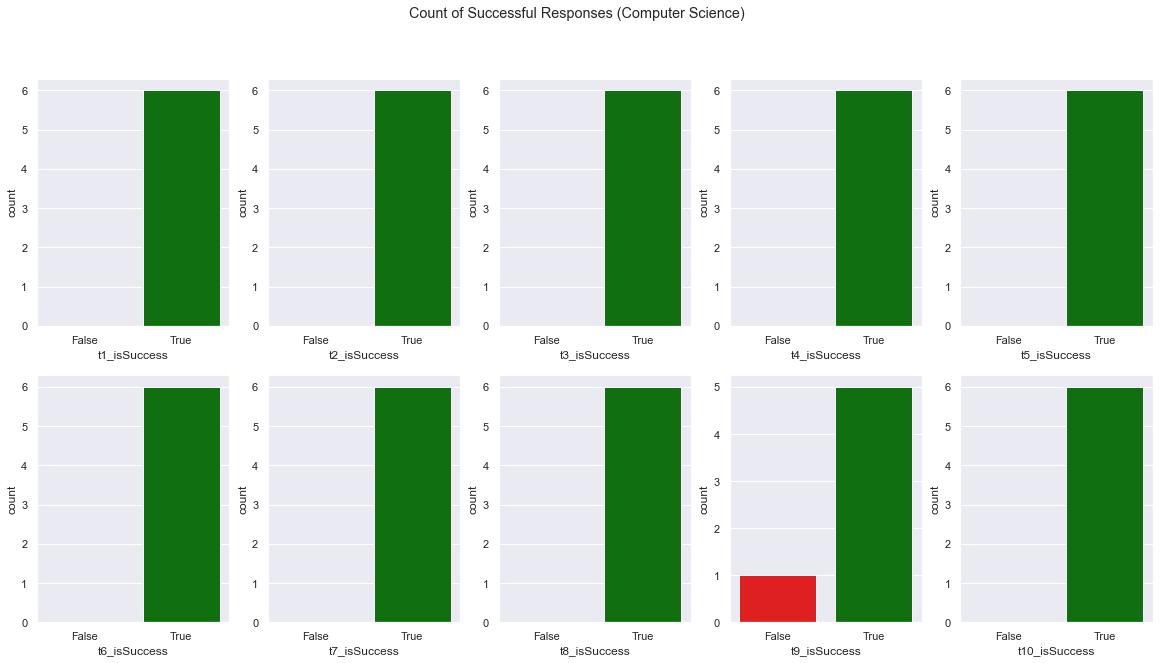

In [26]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Computer Science)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=cs_df)
    
    index = index + 1
    
plt.savefig("../figures/success_cs.png", bbox_inches="tight")

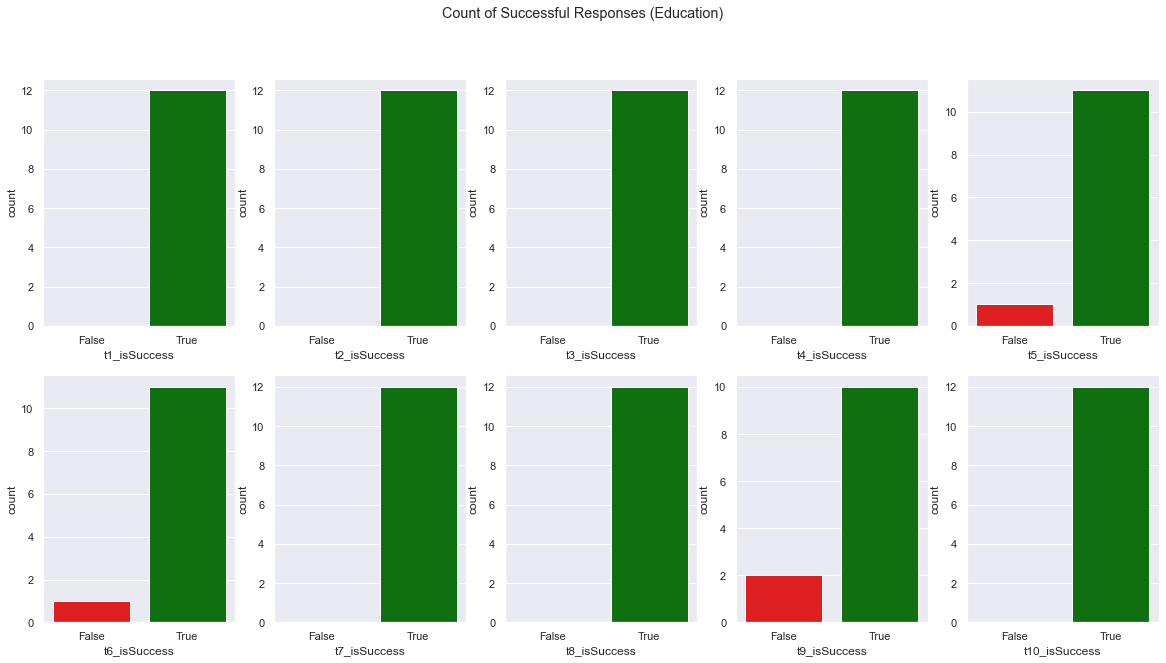

In [27]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Education)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    sns.countplot(x=c, palette=tf_color, order=[False, True], data=ed_df)
    
    index = index + 1
    
plt.savefig("../figures/success_ed.png", bbox_inches="tight")

# Inferrential Stats #

This section calculates inferrential stats, looking for significant differences betweens screen sizes.

## Screen Size ##

### Kruskal-Wallis ###

Due to the small sample size, we also try the non-parametric equivalent of ANOVA.

In [28]:
small = small_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
med   = med_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
large = large_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]

In [29]:
for label in ["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]:
    print(label, stats.kruskal(small[label], med[label], large[label]))

t1_numWords KruskalResult(statistic=1.2664845173041952, pvalue=0.5308677969758013)
t2_numWords KruskalResult(statistic=0.47991313789359263, pvalue=0.7866620258849406)
t3_numWords KruskalResult(statistic=0.01311728395060172, pvalue=0.9934628189731214)
t4_numWords KruskalResult(statistic=0.2993827160493762, pvalue=0.8609736680347508)
t5_numWords KruskalResult(statistic=2.5412681544456097, pvalue=0.2806536092863641)
t6_numWords KruskalResult(statistic=0.49220489977728155, pvalue=0.7818421211839877)
t7_numWords KruskalResult(statistic=0.578037904124854, pvalue=0.7489980102111085)
t8_numWords KruskalResult(statistic=0.12878787878787376, pvalue=0.9376355551838235)
t9_numWords KruskalResult(statistic=0.5726315789473629, pvalue=0.7510254125759346)
t10_numWords KruskalResult(statistic=2.592133620689655, pvalue=0.2736058230603725)


# Chi-Squared #

This section analyzes the two categorical variables: type and success. The Chi-Squared Test of Independence is used.

In [30]:
small = small_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
med   = med_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
large = large_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]

In [32]:
tasks = []
for label in ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]:

    t = {}

    s_row = []
    m_row = []
    l_row = []

    s = small[label].value_counts()
    m = med[label].value_counts()
    l = large[label].value_counts()
    
    for c in ["I", "S", "F", "C"]:
        if c in s.index:
            s_row.append(s[c])
        else:
            s_row.append(0)

        if c in m.index:
            m_row.append(m[c])
        else:
            m_row.append(0)

        if c in l.index:
            l_row.append(l[c])
        else:
            l_row.append(0)

    t["small"] = s_row
    t["medium"] = m_row
    t["large"] = l_row
    
    tasks.append(t)
    
tasks

[{'small': [0, 0, 3, 3], 'medium': [0, 0, 1, 5], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 4, 2], 'medium': [0, 1, 3, 2], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 3, 3], 'medium': [0, 0, 3, 3], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 2, 4], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 0, 6], 'large': [0, 0, 2, 4]},
 {'small': [0, 1, 0, 5], 'medium': [0, 0, 2, 4], 'large': [0, 0, 3, 3]},
 {'small': [0, 1, 2, 3], 'medium': [0, 1, 2, 3], 'large': [0, 0, 1, 5]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 1, 5], 'large': [0, 0, 0, 6]},
 {'small': [1, 0, 1, 4], 'medium': [0, 0, 2, 4], 'large': [0, 0, 1, 5]},
 {'small': [0, 0, 2, 4], 'medium': [0, 0, 4, 2], 'large': [0, 0, 1, 5]}]

In [33]:
totals = {}

s_sums = []
m_sums = []
l_sums = []

for i in range(4):
    s_count = 0
    m_count = 0
    l_count = 0
    
    for task in tasks:
        s_count = s_count + task["small"][i]
        m_count = m_count + task["medium"][i]
        l_count = l_count + task["large"][i]
        
    s_sums.append(s_count)
    m_sums.append(m_count)
    l_sums.append(l_count)
    
totals["small"] = s_sums
totals["medium"] = m_sums
totals["large"] = l_sums

totals

{'small': [1, 2, 18, 39], 'medium': [0, 2, 20, 38], 'large': [0, 0, 20, 40]}

In [34]:
df = pd.DataFrame(data=totals).rename({0:"I", 1:"S", 2:"F", 3:"C"})
df

,small,medium,large
I,1,0,0
S,2,2,0
F,18,20,20
C,39,38,40


In [35]:
stats.chi2_contingency(df)

(4.18921308576481,
 0.6510878577112991,
 6,
 array([[ 0.33333333,  0.33333333,  0.33333333],
        [ 1.33333333,  1.33333333,  1.33333333],
        [19.33333333, 19.33333333, 19.33333333],
        [39.        , 39.        , 39.        ]]))

## Major ##

### Kruskal-Wallis ###

Due to the small sample size, we also try the non-parametric equivalent of ANOVA.

In [36]:
cs = cs_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
ed = ed_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]

In [38]:
for label in ["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]:
    print(label, stats.kruskal(cs[label], ed[label]))

t1_numWords KruskalResult(statistic=3.17937158469945, pvalue=0.07457340490188132)
t2_numWords KruskalResult(statistic=2.362649294245385, pvalue=0.12427098264036776)
t3_numWords KruskalResult(statistic=0.41565393518518506, pvalue=0.5191136512609111)
t4_numWords KruskalResult(statistic=0.11342592592592539, pvalue=0.7362769783410716)
t5_numWords KruskalResult(statistic=2.312433581296493, pvalue=0.12834297352662602)
t6_numWords KruskalResult(statistic=0.08518930957683217, pvalue=0.7703844333585914)
t7_numWords KruskalResult(statistic=4.380295429208471, pvalue=0.036356695374751995)
t8_numWords KruskalResult(statistic=0.38636363636362997, pvalue=0.5342170490077567)
t9_numWords KruskalResult(statistic=0.18118421052631006, pvalue=0.670357517777967)
t10_numWords KruskalResult(statistic=6.432246767241373, pvalue=0.011206673046383788)


# Chi-Squared #

This section analyzes the two categorical variables: type and success. The Chi-Squared Test of Independence is used.

In [39]:
cs = cs_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
ed = ed_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]

In [40]:
tasks = []
for label in ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]:

    t = {}

    c_row = []
    e_row = []

    c = cs[label].value_counts()
    e = ed[label].value_counts()
    
    for val in ["I", "S", "F", "C"]:
        if val in c.index:
            c_row.append(c[val])
        else:
            c_row.append(0)

        if val in e.index:
            e_row.append(e[val])
        else:
            e_row.append(0)

    t["cs"] = c_row
    t["ed"] = e_row
    
    tasks.append(t)
    
tasks

[{'cs': [0, 0, 3, 3], 'ed': [0, 0, 4, 8]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 1, 8, 3]},
 {'cs': [0, 0, 3, 3], 'ed': [0, 0, 6, 6]},
 {'cs': [0, 0, 4, 2], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 1, 5], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 3, 3], 'ed': [0, 1, 2, 9]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 2, 3, 7]},
 {'cs': [0, 0, 0, 6], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 1, 5], 'ed': [1, 0, 3, 8]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 0, 5, 7]}]

In [41]:
totals = {}

c_sums = []
e_sums = []

for i in range(4):
    c_count = 0
    e_count = 0
    
    for task in tasks:
        c_count = c_count + task["cs"][i]
        e_count = e_count + task["ed"][i]
        
    c_sums.append(c_count)
    e_sums.append(e_count)
    
totals["cs"] = c_sums
totals["ed"] = e_sums

totals

{'cs': [0, 0, 21, 39], 'ed': [1, 4, 37, 78]}

In [42]:
df = pd.DataFrame(data=totals).rename({0:"I", 1:"S", 2:"F", 3:"C"})
df

,cs,ed
I,0,1
S,0,4
F,21,37
C,39,78


In [43]:
stats.chi2_contingency(df)

(2.7155172413793105,
 0.4375967394130952,
 3,
 array([[ 0.33333333,  0.66666667],
        [ 1.33333333,  2.66666667],
        [19.33333333, 38.66666667],
        [39.        , 78.        ]]))